In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

import itertools
import warnings
warnings.filterwarnings("ignore")

from utils import plot_moving_average, plot_exponential_smoothing, plot_double_exponential_smoothing
%matplotlib inline


In [2]:
df = pd.read_csv(
    "stock_prices_sample.csv",
    index_col=["DATE"],
    parse_dates=["DATE"]
)


In [3]:
df.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.87,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.79,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0


**only interested in the end of day(EOD) information**

In [4]:
df = df[(df.TICKER == "GF") & (df.TYPE == "EOD")]


In [5]:
df.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.890,18.7900,18.8100,39095.0,18.86,18.890,18.7900,18.8100,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.760,18.5800,18.7400,17468.0,18.58,18.760,18.5800,18.7400,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.520,18.3012,18.4900,22384.0,18.52,18.520,18.3012,18.4900,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.678,18.4700,18.6500,22633.0,18.47,18.678,18.4700,18.6500,22633.0,NaN,0.0,1.0
2018-05-29,GF,BBG000C3C6S2,EOD,daily,18.51,18.510,18.1500,18.2562,67412.0,18.51,18.510,18.1500,18.2562,67412.0,NaN,0.0,1.0


In [6]:
drop_cols = [
    "SPLIT_RATIO",
    "EX_DIVIDEND",
    "ADJ_FACTOR",
    "ADJ_VOLUME",
    "ADJ_CLOSE",
    "ADJ_LOW",
    "ADJ_HIGH",
    "ADJ_OPEN",
    "VOLUME",
    "FREQUENCY",
    "TYPE",
    "FIGI",
]
df.drop(drop_cols, axis=1, inplace=True)

In [7]:
df.head()

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.890,18.7900,18.8100
2018-06-01,GF,18.58,18.760,18.5800,18.7400
2018-05-31,GF,18.52,18.520,18.3012,18.4900
2018-05-30,GF,18.47,18.678,18.4700,18.6500
2018-05-29,GF,18.51,18.510,18.1500,18.2562


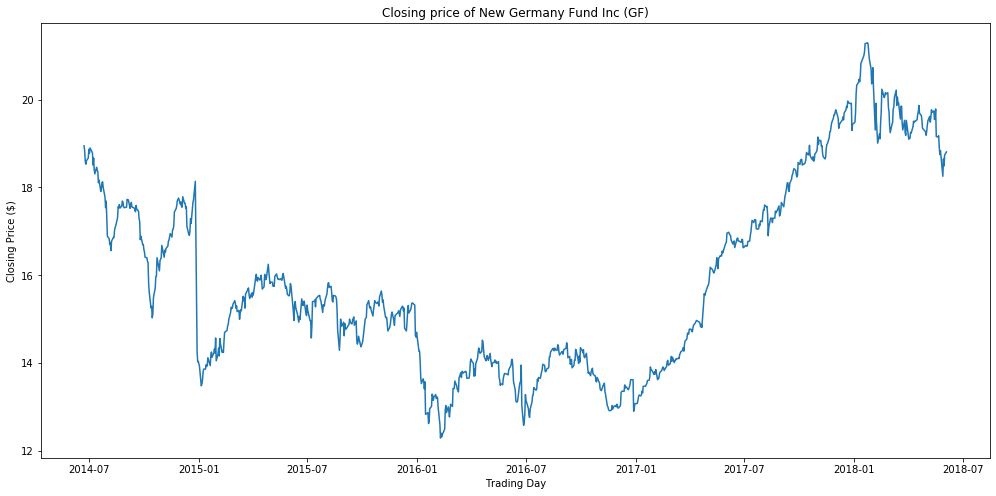

In [8]:
plt.figure(figsize=(17, 8))
plt.plot(df["CLOSE"])
plt.title("Closing price of New Germany Fund Inc (GF)")
plt.ylabel("Closing Price ($)")
plt.xlabel("Trading Day")
plt.grid(False)


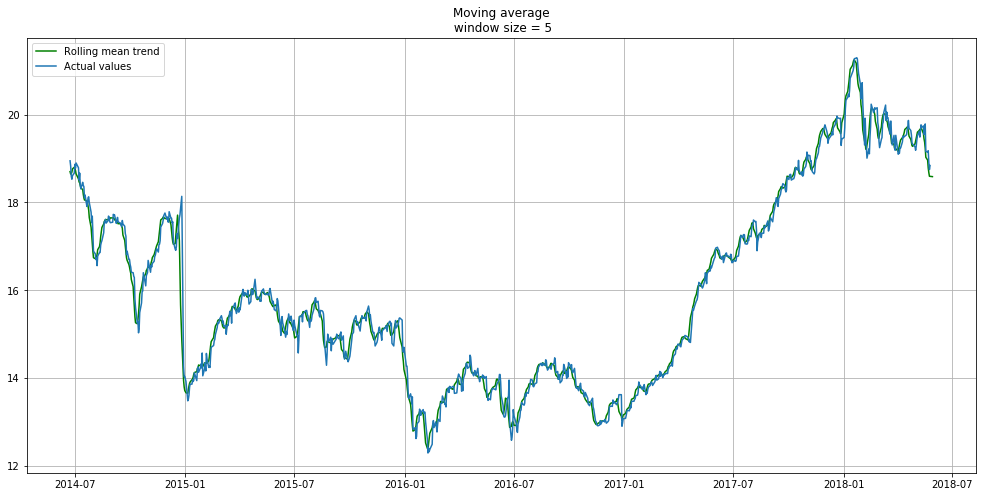

In [9]:
# Smooth by the previous 5 days (by week)
plot_moving_average(df["CLOSE"], 5)

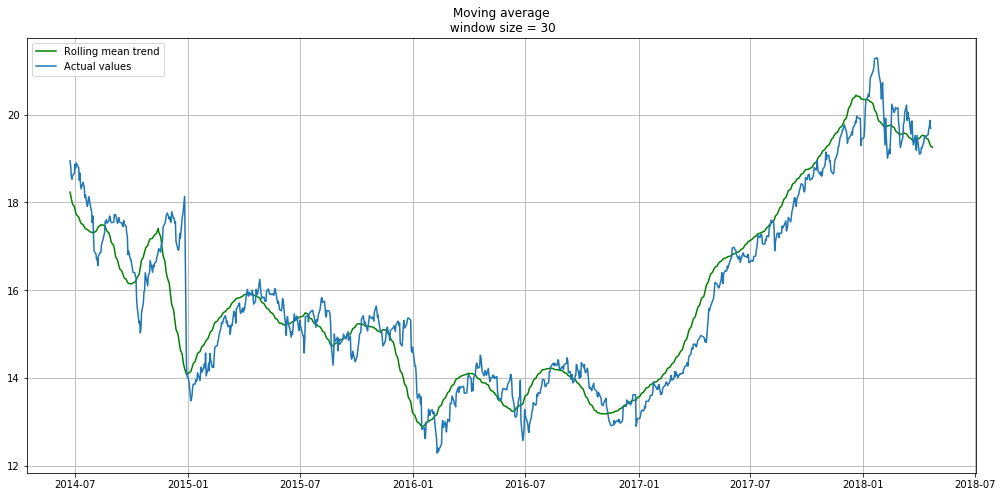

In [10]:
plot_moving_average(df["CLOSE"], 30)

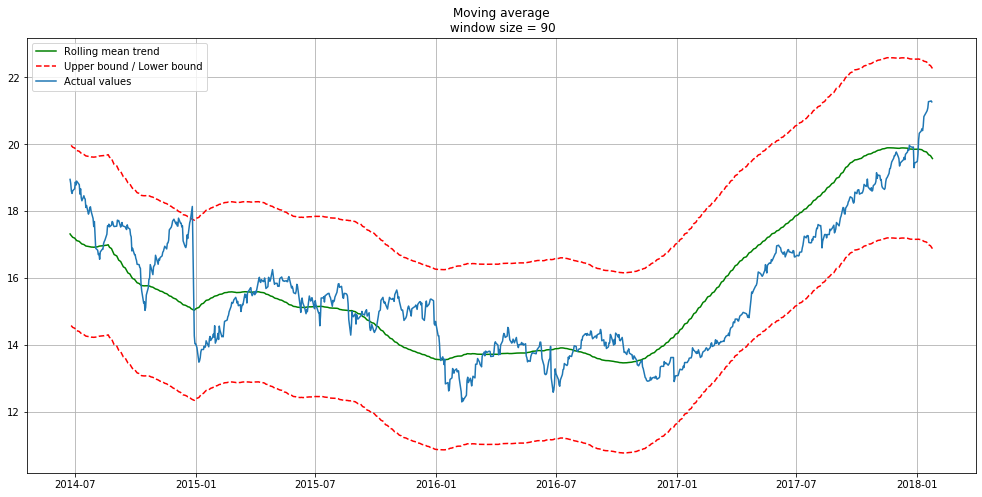

In [11]:
plot_moving_average(df["CLOSE"], 90, plot_intervals=True)

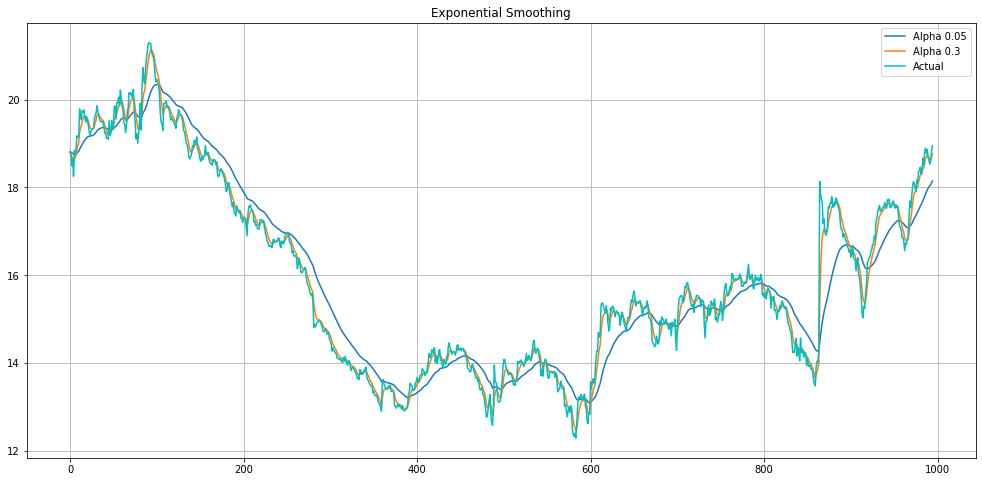

In [12]:
plot_exponential_smoothing(df["CLOSE"], [0.05, 0.3])

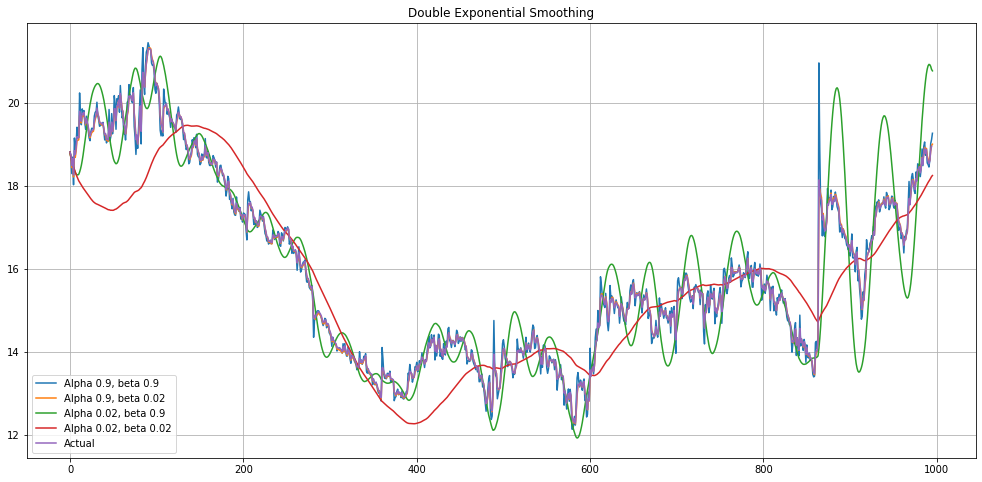

In [13]:
plot_double_exponential_smoothing(df["CLOSE"], alphas=[0.9, 0.02], betas=[0.9, 0.02])